In [2]:
import os
import librosa
import librosa.display
import json 
import importlib
import formExtractor as fem
importlib.reload(fem)
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_audio_files(path):
    audio_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".mp3"):
                audio_files.append(os.path.join(root, file))
    return audio_files

In [4]:
path = '/home/laura/aimir/'
collection = 'suno' #lastfm, suno, udio
song_files = path + collection + '/audio'
files = load_audio_files(song_files)
print(len(files))

96365


In [5]:
id = 1
song = files[id]

#song = '/home/laura/aimir/boomy/audio/14065870.mp3'
id_file = song.split('/')[-1].split('.')[0]
song

'/home/laura/aimir/suno/audio/00005c16-cdf5-4f83-9c1b-65c6f9462872.mp3'

In [6]:
# Load the audio file
y, sr = librosa.load(song)

# Compute chroma features (you can also use MFCCs or other features)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

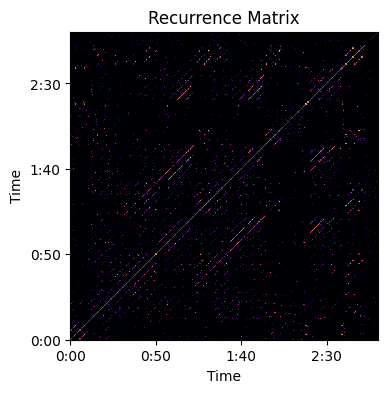

In [7]:
# Compute the recurrence matrix
recurrence = librosa.segment.recurrence_matrix(chroma, mode='affinity', sym=True)

# Enhance diagonals to emphasize repeating structures
recurrence = librosa.segment.path_enhance(recurrence, n=7)

# Plot the recurrence matrix
plt.figure(figsize=(10, 4))
librosa.display.specshow(recurrence, x_axis='time', y_axis='time')
plt.title('Recurrence Matrix')
plt.show()


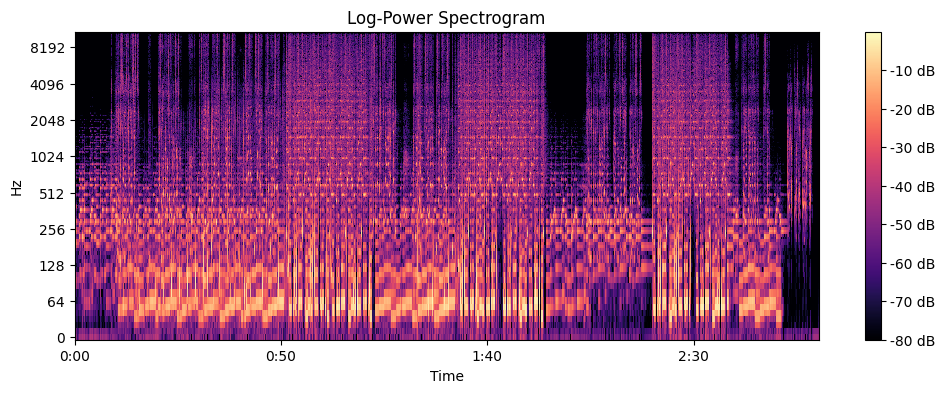

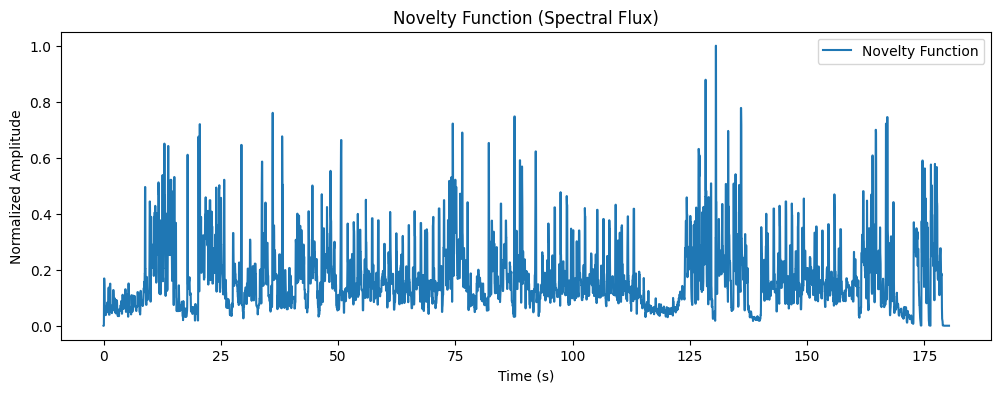

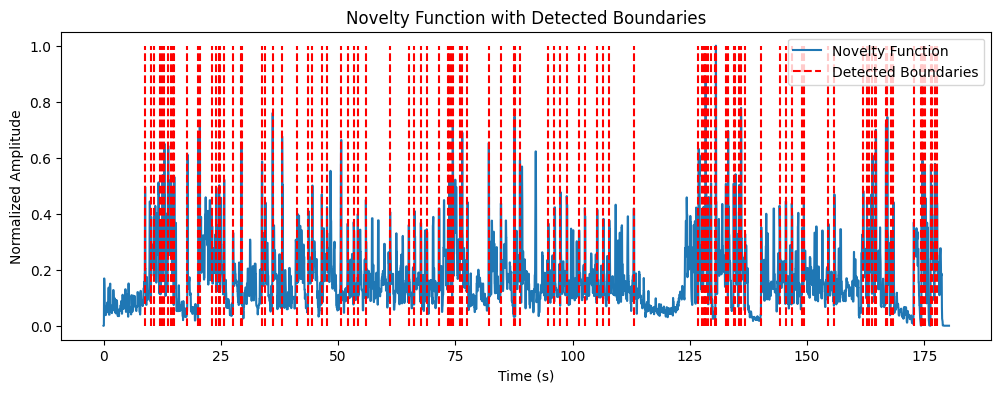

Section 0: Start = 0.00s, End = 8.82s, Duration = 8.82s
Section 1: Start = 8.82s, End = 10.10s, Duration = 1.28s
Section 2: Start = 10.10s, End = 10.80s, Duration = 0.70s
Section 3: Start = 10.80s, End = 12.05s, Duration = 1.25s
Section 4: Start = 12.05s, End = 12.56s, Duration = 0.51s
Section 5: Start = 12.56s, End = 12.98s, Duration = 0.42s
Section 6: Start = 12.98s, End = 13.75s, Duration = 0.77s
Section 7: Start = 13.75s, End = 14.30s, Duration = 0.56s
Section 8: Start = 14.30s, End = 14.79s, Duration = 0.49s
Section 9: Start = 14.79s, End = 15.05s, Duration = 0.26s
Section 10: Start = 15.05s, End = 17.88s, Duration = 2.83s
Section 11: Start = 17.88s, End = 20.20s, Duration = 2.32s
Section 12: Start = 20.20s, End = 20.48s, Duration = 0.28s
Section 13: Start = 20.48s, End = 23.06s, Duration = 2.58s
Section 14: Start = 23.06s, End = 24.03s, Duration = 0.98s
Section 15: Start = 24.03s, End = 24.59s, Duration = 0.56s
Section 16: Start = 24.59s, End = 24.68s, Duration = 0.09s
Section 17

In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the audio file
y, sr = librosa.load(song)

# Compute the magnitude spectrogram
hop_length = 512
S = np.abs(librosa.stft(y, hop_length=hop_length))

# Compute the log-power spectrogram
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.title('Log-Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Compute the spectral flux (novelty function)
onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)

# Enhance the novelty function using median filtering
onset_env_smooth = signal.medfilt(onset_env, kernel_size=7)

# Normalize the novelty function
onset_env_smooth = onset_env_smooth / np.max(onset_env_smooth)

# Plot the novelty function
frames = np.arange(len(onset_env_smooth))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

plt.figure(figsize=(12, 4))
plt.plot(t, onset_env_smooth, label='Novelty Function')
plt.title('Novelty Function (Spectral Flux)')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.show()

# Detect peaks in the novelty function
peak_indices = librosa.util.peak_pick(onset_env_smooth, pre_max=3, post_max=3, pre_avg=3, post_avg=3, delta=0.1, wait=3)

# Convert peak indices to times
peak_times = librosa.frames_to_time(peak_indices, sr=sr, hop_length=hop_length)

# Plot the novelty function with detected peaks
plt.figure(figsize=(12, 4))
plt.plot(t, onset_env_smooth, label='Novelty Function')
plt.vlines(peak_times, ymin=0, ymax=1, color='r', linestyle='--', label='Detected Boundaries')
plt.title('Novelty Function with Detected Boundaries')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.show()

# Segment the audio based on detected boundaries
boundaries = np.concatenate(([0], peak_indices, [S.shape[1]-1]))
sections = []
section_times = []

for i in range(len(boundaries)-1):
    start_frame = boundaries[i]
    end_frame = boundaries[i+1]
    section = S[:, start_frame:end_frame]
    sections.append(section)
    section_start_time = librosa.frames_to_time(start_frame, sr=sr, hop_length=hop_length)
    section_end_time = librosa.frames_to_time(end_frame, sr=sr, hop_length=hop_length)
    section_times.append((section_start_time, section_end_time))

# Optional: Print the section times
for i, (start_time, end_time) in enumerate(section_times):
    print(f'Section {i}: Start = {start_time:.2f}s, End = {end_time:.2f}s, Duration = {end_time - start_time:.2f}s')


In [12]:
from sklearn.cluster import KMeans
import numpy as np

# Ensure there are enough sections to cluster
num_clusters = 4
if len(section_features) >= num_clusters:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    section_features_scaled = scaler.fit_transform(section_features)
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(section_features_scaled)
    labels = kmeans.labels_
    
    # Assign labels to sections
    for i, label in enumerate(labels):
        start_time, end_time = section_times[i]
        print(f'Section {i}: Cluster {label}, Start = {start_time:.2f}s, End = {end_time:.2f}s')
else:
    print(f"Not enough sections to cluster. Sections available: {len(section_features)}")

# Compute feature vectors for each section (e.g., mean MFCCs)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length)

section_features = []
valid_section_times = []  # To keep track of times for valid sections

for idx, (start_frame, end_frame) in enumerate(zip(boundaries[:-1], boundaries[1:])):
    # Ensure indices are integers and within bounds
    start_frame = int(max(0, start_frame))
    end_frame = int(min(mfcc.shape[1], end_frame))

    # Check for empty sections
    if start_frame >= end_frame:
        print(f"Skipping empty section {idx} (frames {start_frame}-{end_frame})")
        continue

    # Extract MFCCs for the section
    section_mfcc = mfcc[:, start_frame:end_frame]

    # Check for NaNs in section_mfcc
    if np.isnan(section_mfcc).any():
        print(f"Skipping section {idx} due to NaNs in MFCCs (frames {start_frame}-{end_frame})")
        continue

    # Compute mean and variance of MFCCs
    mean_mfcc = np.mean(section_mfcc, axis=1)
    var_mfcc = np.var(section_mfcc, axis=1)

    # Combine features
    feature_vector = np.concatenate((mean_mfcc, var_mfcc))

    # Check for NaNs in feature_vector
    if np.isnan(feature_vector).any():
        print(f"Skipping section {idx} due to NaNs in feature vector (frames {start_frame}-{end_frame})")
        continue

    # Append valid feature vector and corresponding section time
    section_features.append(feature_vector)
    valid_section_times.append((start_frame, end_frame))

# Convert to NumPy array
section_features = np.array(section_features)

# Verify that we have enough sections to cluster
if len(section_features) < num_clusters:
    print(f"Not enough valid sections to perform clustering. Found {len(section_features)} valid sections.")
else:
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(section_features)
    labels = kmeans.labels_

    # Assign labels to sections
    for i, label in enumerate(labels):
        start_frame, end_frame = valid_section_times[i]
        start_time = librosa.frames_to_time(start_frame, sr=sr, hop_length=hop_length)
        end_time = librosa.frames_to_time(end_frame, sr=sr, hop_length=hop_length)
        print(f'Section {i}: Cluster {label}, Start = {start_time:.2f}s, End = {end_time:.2f}s')


Section 0: Cluster 2, Start = 0.00s, End = 8.82s
Section 1: Cluster 2, Start = 8.82s, End = 10.10s
Section 2: Cluster 2, Start = 10.10s, End = 10.80s
Section 3: Cluster 1, Start = 10.80s, End = 12.05s
Section 4: Cluster 3, Start = 12.05s, End = 12.56s
Section 5: Cluster 2, Start = 12.56s, End = 12.98s
Section 6: Cluster 1, Start = 12.98s, End = 13.75s
Section 7: Cluster 1, Start = 13.75s, End = 14.30s
Section 8: Cluster 1, Start = 14.30s, End = 14.79s
Section 9: Cluster 3, Start = 14.79s, End = 15.05s
Section 10: Cluster 3, Start = 15.05s, End = 17.88s
Section 11: Cluster 3, Start = 17.88s, End = 20.20s
Section 12: Cluster 3, Start = 20.20s, End = 20.48s
Section 13: Cluster 1, Start = 20.48s, End = 23.06s
Section 14: Cluster 1, Start = 23.06s, End = 24.03s
Section 15: Cluster 1, Start = 24.03s, End = 24.59s
Section 16: Cluster 1, Start = 24.59s, End = 24.68s
Section 17: Cluster 3, Start = 24.68s, End = 24.92s
Section 18: Cluster 1, Start = 24.92s, End = 25.68s
Section 19: Cluster 3, St

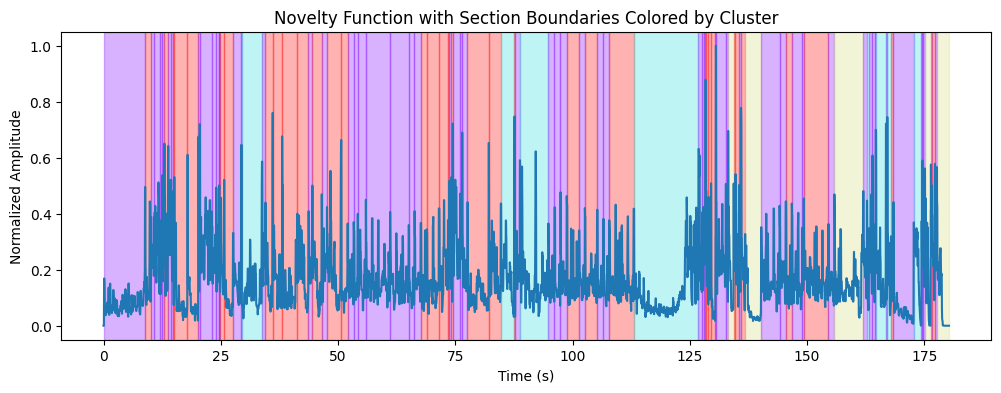

In [13]:
import matplotlib.cm as cm

# Plot the novelty function with section boundaries colored by cluster
t = librosa.frames_to_time(np.arange(len(onset_env_smooth)), sr=sr, hop_length=hop_length)

plt.figure(figsize=(12, 4))
plt.plot(t, onset_env_smooth, label='Novelty Function')
colors = cm.rainbow(np.linspace(0, 1, num_clusters))

for i, (start_time, end_time) in enumerate(section_times):
    label = labels[i]
    plt.axvspan(start_time, end_time, color=colors[label], alpha=0.3)

plt.title('Novelty Function with Section Boundaries Colored by Cluster')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Amplitude')
plt.show()


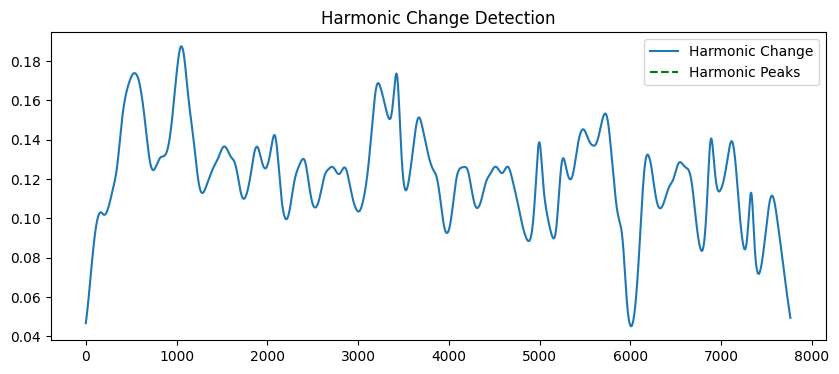

In [14]:
# Compute harmonic change detection function
hcdf = librosa.feature.tempogram(y=y, sr=sr)
hcdf_mean = np.mean(hcdf, axis=0)

# Detect peaks in harmonic change
hcdf_peaks = librosa.util.peak_pick(hcdf_mean, pre_max=1, post_max=1, pre_avg=1, post_avg=1, delta=0.1, wait=1)

# Map peaks to times
hcdf_times = librosa.frames_to_time(hcdf_peaks, sr=sr)

# Overlay harmonic change peaks on the novelty plot
plt.figure(figsize=(10, 4))
plt.plot(hcdf_mean, label='Harmonic Change')
plt.vlines(hcdf_peaks, ymin=0, ymax=np.max(hcdf_mean), color='g', linestyle='--', label='Harmonic Peaks')
plt.legend()
plt.title('Harmonic Change Detection')
plt.show()


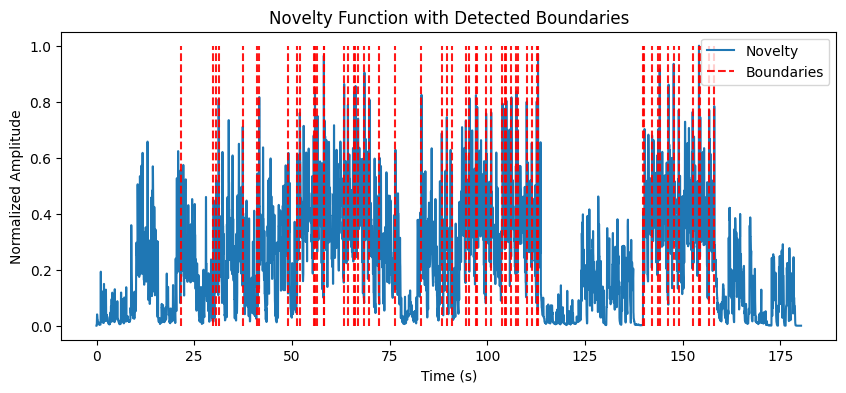

In [21]:
# Compute the Short-Time Fourier Transform (STFT)
S = np.abs(librosa.stft(y))
# Compute the novelty function
novelty = librosa.onset.onset_strength(S=S, sr=sr)

# Smooth the novelty function
from scipy.ndimage import median_filter

novelty_smooth = median_filter(novelty, size=5)
novelty_smooth = librosa.util.normalize(novelty_smooth)

# Detect peaks in the smoothed novelty function
peak_indices = librosa.util.peak_pick(novelty_smooth, pre_max=1, post_max=1,
                                      pre_avg=1, post_avg=1, delta=0.2, wait=1)


# Compute peaks in the novelty function
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
boundaries = librosa.util.peak_pick(novelty_smooth.flatten(), pre_max=1, post_max=1, pre_avg=1, post_avg=1, delta=0.2, wait=1)

# Convert frame indices to timestamps
times = librosa.frames_to_time(boundaries, sr=sr)

# Plot the novelty function with detected boundaries

plt.figure(figsize=(10, 4))
plt.plot(librosa.frames_to_time(range(len(novelty_smooth)), sr=sr), novelty_smooth, label='Novelty')
plt.vlines(times, ymin=0, ymax=max(novelty_smooth), color='r', alpha=0.9, linestyle='--', label='Boundaries')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.title('Novelty Function with Detected Boundaries')
plt.show()



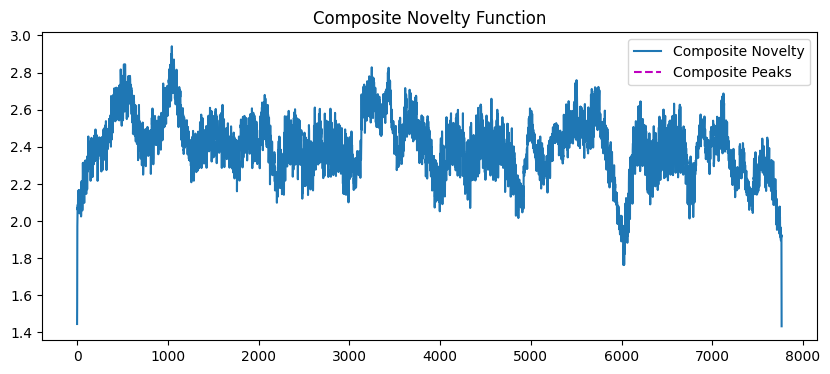

In [19]:
# Compute spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
spectral_contrast_mean = np.mean(spectral_contrast, axis=0)

# Normalize features
novelty_norm = librosa.util.normalize(novelty_smooth.flatten())
hcdf_norm = librosa.util.normalize(hcdf_mean)
spectral_contrast_norm = librosa.util.normalize(spectral_contrast_mean)

# Combine features
composite_novelty = novelty_norm + hcdf_norm + spectral_contrast_norm

# Detect composite peaks
composite_peaks = librosa.util.peak_pick(composite_novelty, pre_max=1, post_max=1, pre_avg=1, post_avg=1, delta=0.5, wait=1)
composite_times = librosa.frames_to_time(composite_peaks, sr=sr)

# Plot composite novelty
plt.figure(figsize=(10, 4))
plt.plot(composite_novelty, label='Composite Novelty')
plt.vlines(composite_peaks, ymin=0, ymax=np.max(composite_novelty), color='m', linestyle='--', label='Composite Peaks')
plt.legend()
plt.title('Composite Novelty Function')
plt.show()